In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import gym
import argparse
from ddpg_torch.ddpg_torch import Agent
import gym
import numpy as np
from lifting_rl.linkage_env import LinkageEnv

from livelossplot import PlotLosses

In [2]:
params = {
    "N_LINKS": 1,
    "GOAL_POS": np.array([np.pi / 4, 0], dtype=np.float32),
    "INIT_STATE": np.array([-np.pi / 2, 0], dtype=np.float32),
    "PARAM_VALS": np.array([9.81, 0.4, 1], dtype=np.float32),
    "OBS_LOW": np.array([0, -8], dtype=np.float32),
    "OBS_HIGH": np.array(
        [3*np.pi/4, 8], dtype=np.float32
    ),
    "ACT_LOW": -8,
    "ACT_HIGH": 8,
    "TIME_STEP": 0.01,
    "VIDEO_FPS": 30,
}


In [3]:
angles_file = "/home/mans/git/human-body-model-dynamics/data/skeleton_angles.csv"

In [4]:
env = LinkageEnv(angles_file, params, verbose=0)
#env = gym.make("Pendulum-v0")

u0(t)*N.z
\frac{l_{0} \operatorname{u_{0}}{\left(t \right)}}{2}\mathbf{\hat{rf0}_y}
------------------
observation_space:  Box(2,)
action_space:  Box(1,)


In [5]:
agent = Agent(
    lr_actor=0.000025,
    lr_critic=0.00025,
    input_dims=[3],
    tau=0.001,
    env=env,
    batch_size=64,
    layer1_size=400,
    layer2_size=300,
    n_actions=1,
)

In [6]:
np.random.seed(123)

In [7]:
liveloss = PlotLosses()

In [8]:
score_history = []

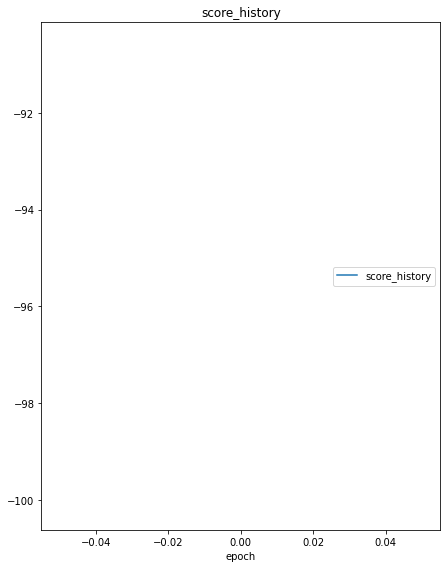

score_history
	score_history    	 (min:  -95.376, max:  -95.376, cur:  -95.376)
episode 0 score -95.38 100 game average -95.38


KeyboardInterrupt: 

In [9]:
for i in range(100000):
    done = False
    score = 0
    obs = env.reset()
    agent.noise.reset()
    while not done:
        env.render()
        act = agent.choose_action(obs)
        new_state, reward, done, info = env.step(act)
        agent.remember(obs, act, reward, new_state, int(done))
        agent.learn()
        score += reward
        obs = new_state

    score_history.append(score)

    metrics = {"score_history": np.mean(score_history[-100:])}
    liveloss.update(metrics)
    liveloss.send()
    print(
        "episode",
        i,
        "score %.2f" % score,
        "100 game average %.2f" % np.mean(score_history[-100:]),
    )
env.close()